In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

In [2]:
results_dict = {}

In [3]:
df = pd.read_csv('../_data/airline-passengers.csv')

In [4]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df['month'] = pd.to_datetime(df['month'])

In [7]:
# check data visually
# check stationarity with ADF

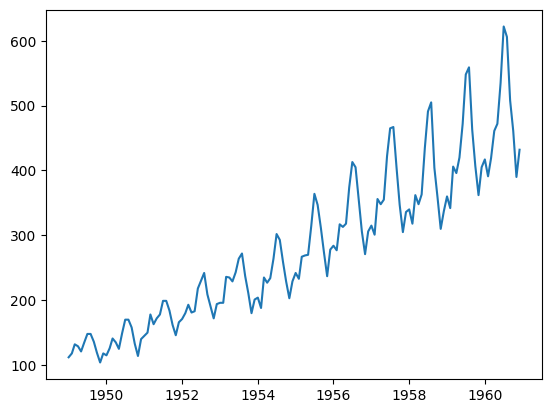

In [8]:
plt.plot(df['month'], df['passengers'])

In [9]:
adf_result = adfuller(df['passengers'])

print("ADF score:", adf_result[0])
print("p-value:", adf_result[1])
print("critical values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF score: 0.8153688792060442
p-value: 0.9918802434376409
critical values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


In [10]:
# create ARIMA predictions for next 12 periods
# - order (1, 0, 0)
# - order (0, 0, 1)

In [11]:
ntest = 12

In [12]:
train = df.iloc[:-ntest, :]
test = df.iloc[-ntest:, :]

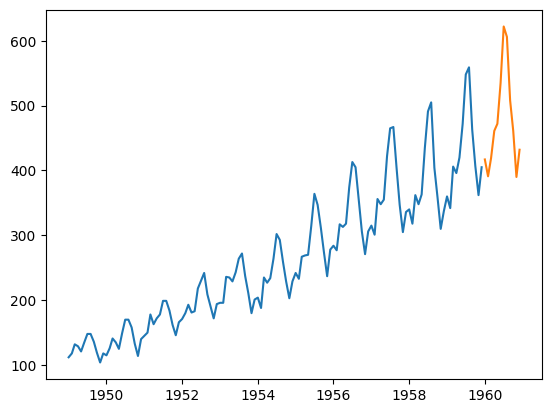

In [13]:
plt.plot(train['month'], train['passengers'])
plt.plot(test['month'], test['passengers'])

In [14]:
order = (1, 0, 0)
model = ARIMA(train['passengers'], order=order)
results = model.fit()

In [15]:
train_pred = results.predict(0, len(train))

forecast = results.get_forecast(steps=ntest)

test_pred = forecast.predicted_mean
test_pred_lower = forecast.conf_int().loc[:, 'lower passengers']
test_pred_upper = forecast.conf_int().loc[:, 'upper passengers']

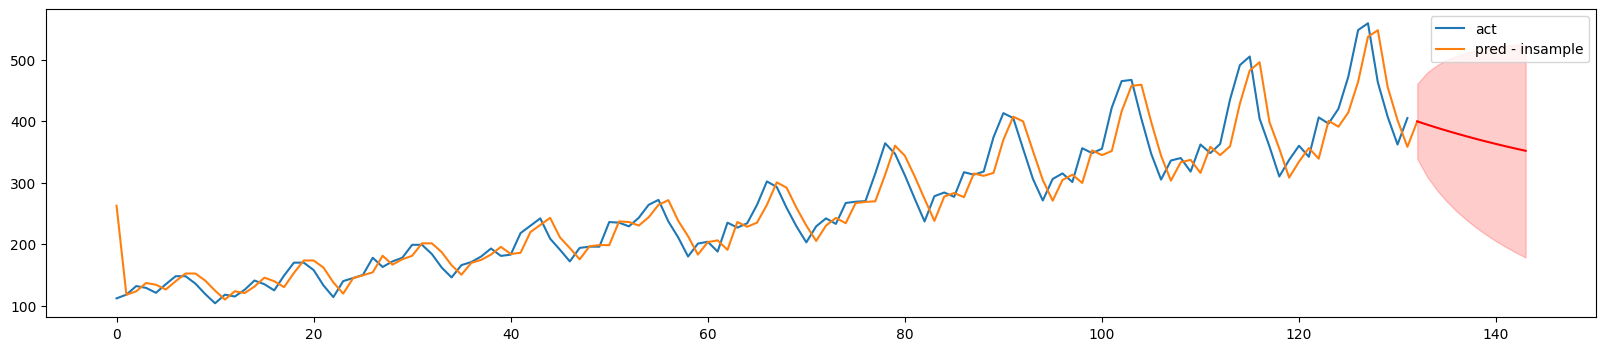

In [16]:
plt.figure(figsize=(20,4))
plt.plot(train['passengers'], label='act')
plt.plot(train_pred, label='pred - insample')
plt.legend()
plt.plot(test_pred, color='red')
plt.fill_between(test_pred_lower.index,
                y1 = test_pred_lower,
                y2 = test_pred_upper,
                color='red', alpha=0.2)

In [17]:
order = (0, 0, 1)
model = ARIMA(train['passengers'], order=order)
results = model.fit()

train_pred = results.predict(0, len(train))

forecast = results.get_forecast(steps=ntest)

test_pred = forecast.predicted_mean
test_pred_lower = forecast.conf_int().loc[:, 'lower passengers']
test_pred_upper = forecast.conf_int().loc[:, 'upper passengers']

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


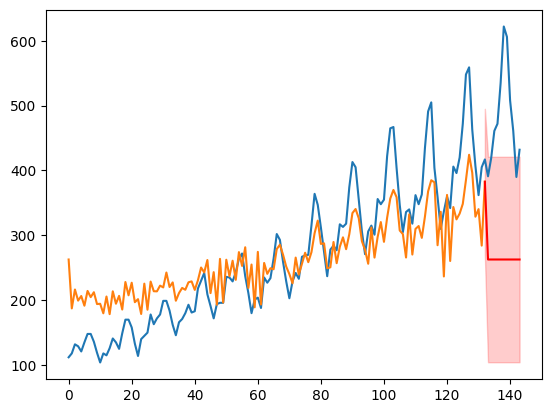

In [18]:
plt.plot(df['passengers'])
plt.plot(train_pred)
plt.plot(test_pred, color='red')
plt.fill_between(test_pred_lower.index,
                y1 = test_pred_lower,
                y2 = test_pred_upper,
                color='red', alpha=0.2)

In [19]:
# create a function name 'do_modelling_and_plotting' with inputs: target_col, order
# target_col: str (column name)
# order: tuple (ARIMA model order to use)
# eg.: do_modelling_and_plotting('passengers', (1, 0, 0))

# the function should create the ARIMA model with the given order on the target_col and create and plot 
# a predictions for train and test data
# The plot title should be the model order and RMSE of the forecast
#     plt.title(f'ARIMA - {order} - RMSE: {rmse:.2f}')
# save the rmse results in the dictionary named: results_dict

In [20]:
def do_modelling_and_plotting(target_col, order):
    model = ARIMA(train[target_col], order=order)
    results = model.fit()
    
    train_pred = results.predict(0, len(train))
    forecast = results.get_forecast(ntest)

    
    test_pred = forecast.predicted_mean
        
        
    sq_err = mean_squared_error(test['passengers'], test_pred)
    rmse = np.sqrt(sq_err)

    plt.plot(df['passengers'])
    plt.plot(train_pred)
    plt.plot(test_pred, color='red')
    plt.title(f'ARIMA - {order} - RMSE: {rmse:.2f}')
    
    dict_key = f'{target_col} - {order}'
    results_dict[dict_key] = np.round(rmse, 2)

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


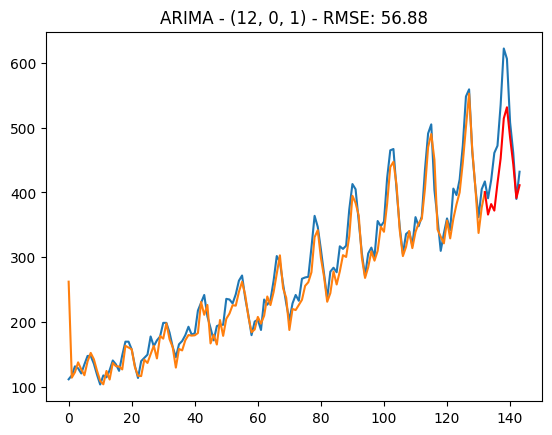

In [21]:
do_modelling_and_plotting('passengers', (12, 0, 1))

In [22]:
# use differentation to create a non-stationary time series (check with ADF)
# use ACF-PACF plots to check the right orders for ARIMA

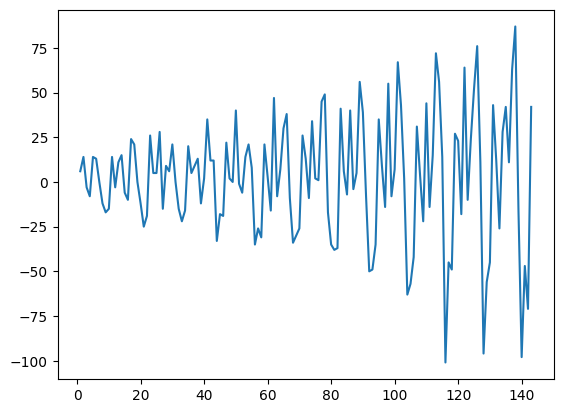

In [23]:
plt.plot(df['passengers'].diff())

In [24]:
adf_result = adfuller(df['passengers'].diff().dropna())

print("ADF score:", adf_result[0])
print("p-value:", adf_result[1])
print("critical values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF score: -2.8292668241699945
p-value: 0.05421329028382621
critical values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


Text(0.5, 1.0, 'PACF')

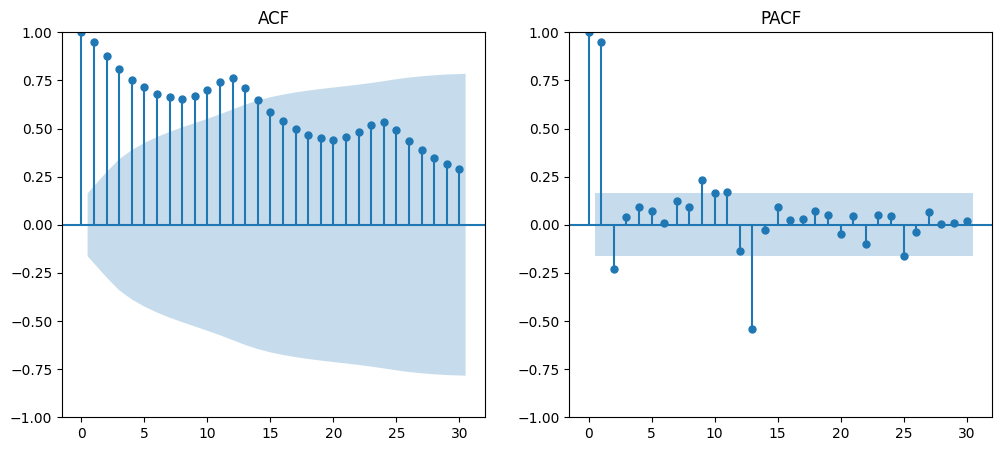

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df['passengers'], ax=ax[0], lags=30)
ax[0].set_title("ACF")

plot_pacf(df['passengers'], ax=ax[1], lags=30, method='ywm')
ax[1].set_title("PACF")

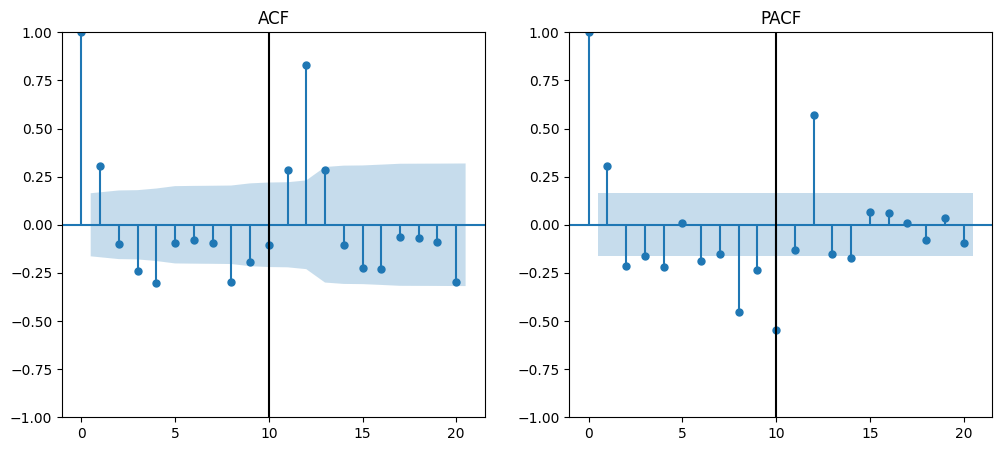

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df['passengers'].diff().dropna(), ax=ax[0], lags=20)
ax[0].set_title("ACF")
ax[0].axvline(10, color='k')

plot_pacf(df['passengers'].diff().dropna(), ax=ax[1], lags=20, method='ywm')
ax[1].set_title("PACF")
ax[1].axvline(10, color='k')

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


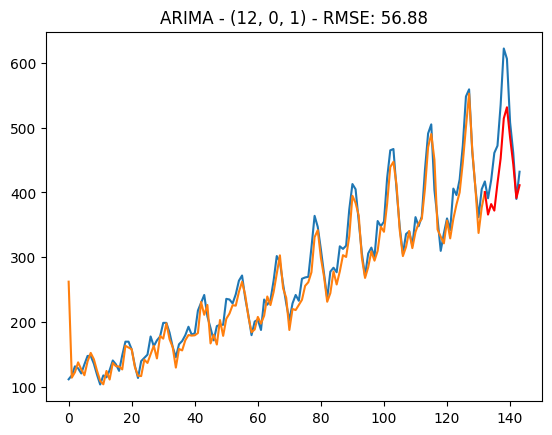

In [27]:
do_modelling_and_plotting('passengers', (12, 0, 1))

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


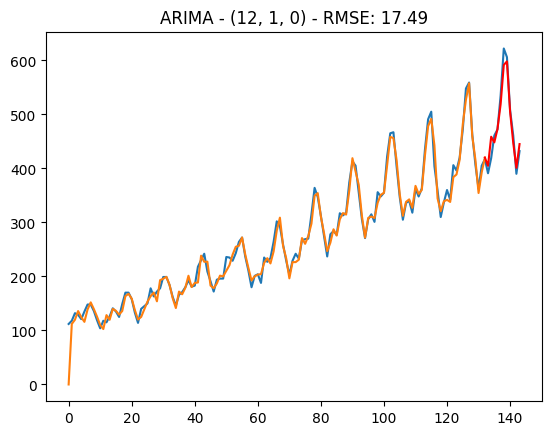

In [28]:
do_modelling_and_plotting('passengers', (12, 1, 0))

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


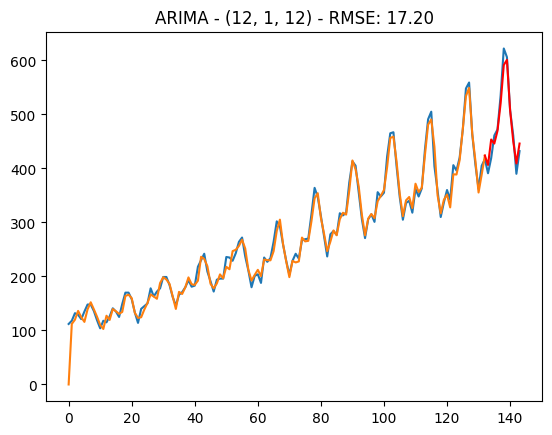

In [29]:
do_modelling_and_plotting('passengers', (12, 1, 12))

In [30]:
# decrease variance with log transform

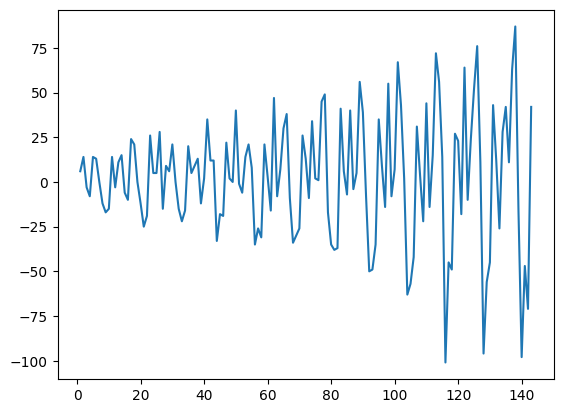

In [31]:
plt.plot(df['passengers'].diff())

In [32]:
df['log_passengers'] = np.log(df['passengers'])

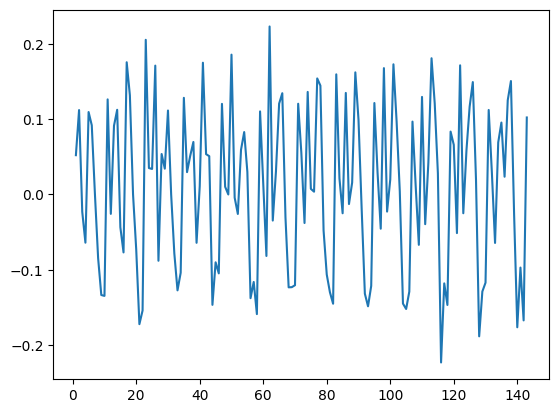

In [33]:
plt.plot(df['log_passengers'].diff())

In [34]:
train = df.iloc[:-ntest, :]
test = df.iloc[-ntest:, :]

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


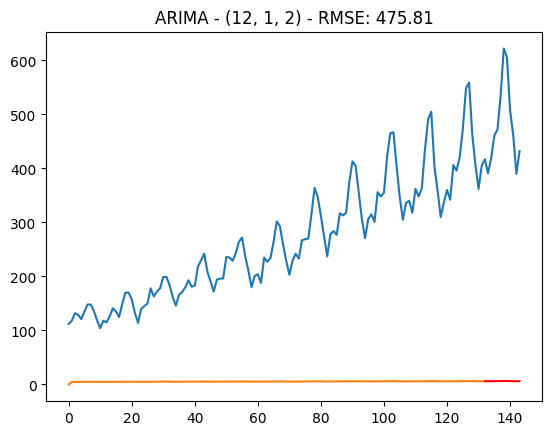

In [35]:
do_modelling_and_plotting('log_passengers', (12, 1, 2))

In [36]:
order = (12, 1, 2)
model = ARIMA(train['log_passengers'], order=order)
results = model.fit()

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
train_pred = np.exp(results.predict(0, len(train)))

In [38]:
forecast = results.get_forecast(steps=ntest)

In [39]:
test_pred = np.exp(forecast.predicted_mean)

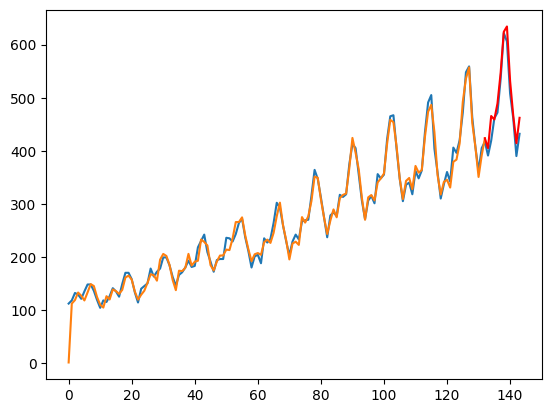

In [40]:
plt.plot(df['passengers'])
plt.plot(train_pred)
plt.plot(test_pred, color='r')

In [41]:
def do_modelling_and_plotting(target_col, order, log=False):
    model = ARIMA(train[target_col], order=order)
    results = model.fit()
    
    train_pred = results.predict(0, len(train))
    forecast = results.get_forecast(ntest)

    
    test_pred = forecast.predicted_mean
    
    if log == True:
        train_pred = np.exp(train_pred)
        test_pred = np.exp(test_pred)
        
        
    sq_err = mean_squared_error(test['passengers'], test_pred)
    rmse = np.sqrt(sq_err)

    plt.plot(df['passengers'])
    plt.plot(train_pred)
    plt.plot(test_pred, color='red')
    plt.title(f'ARIMA - {order} - RMSE: {rmse:.2f}')
    
    dict_key = f'{target_col} - {order}'
    results_dict[dict_key] = np.round(rmse, 2)

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


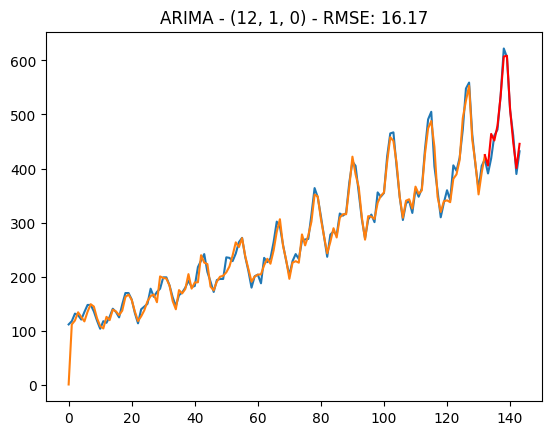

In [42]:
do_modelling_and_plotting('log_passengers', (12, 1, 0), log=True)

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


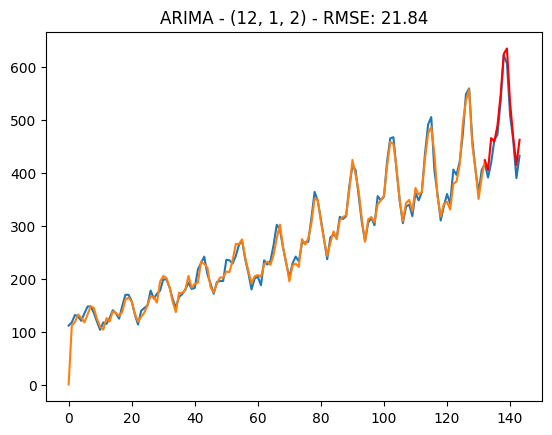

In [43]:
do_modelling_and_plotting('log_passengers', (12, 1, 2), log=True)

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


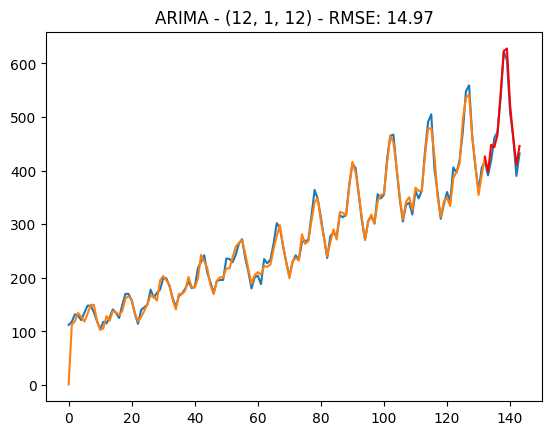

In [44]:
do_modelling_and_plotting('log_passengers', (12, 1, 12), log=True)

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


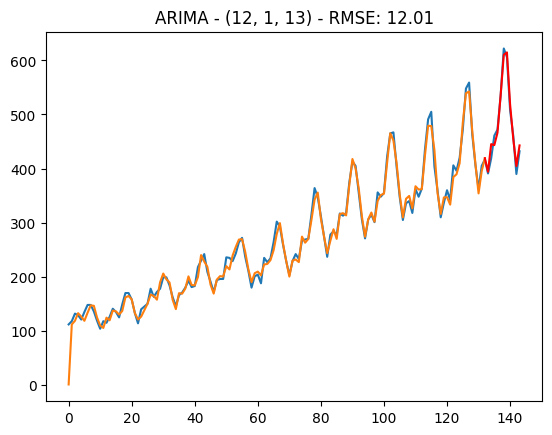

In [45]:
do_modelling_and_plotting('log_passengers', (12, 1, 13), log=True)

In [46]:
results_dict

{'passengers - (12, 0, 1)': 56.88,
 'passengers - (12, 1, 0)': 17.49,
 'passengers - (12, 1, 12)': 17.2,
 'log_passengers - (12, 1, 2)': 21.84,
 'log_passengers - (12, 1, 0)': 16.17,
 'log_passengers - (12, 1, 12)': 14.97,
 'log_passengers - (12, 1, 13)': 12.01}